In [13]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from astropy.stats import RipleysKEstimator

Text(0, 0.5, 'y')

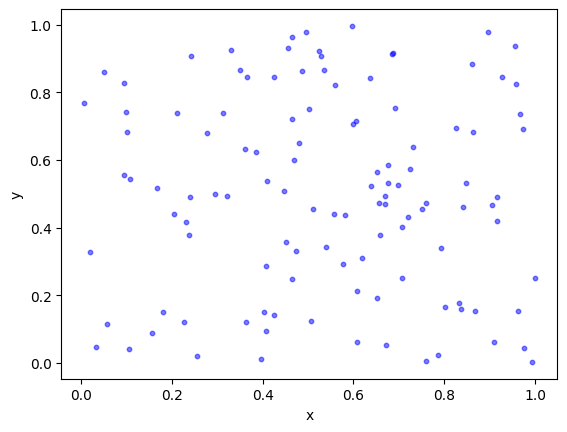

In [14]:
#Simulation window parameters
xMin=0;xMax=1;
yMin=0;yMax=1;
xDelta=xMax-xMin;yDelta=yMax-yMin; #rectangle dimensions
areaTotal=xDelta*yDelta;
 
#Point process parameters
lambda0=100; #intensity (ie mean density) of the Poisson process
 
#Simulate Poisson point process
numbPoints = scipy.stats.poisson( lambda0*areaTotal ).rvs()#Poisson number of points
xx = xDelta*scipy.stats.uniform.rvs(0,1,((numbPoints,1)))+xMin#x coordinates of Poisson points
yy = yDelta*scipy.stats.uniform.rvs(0,1,((numbPoints,1)))+yMin#y coordinates of Poisson points
#Plotting
plt.scatter(xx,yy, s=10, edgecolor='b', facecolor='b', alpha=0.5 )
plt.xlabel("x"); plt.ylabel("y")

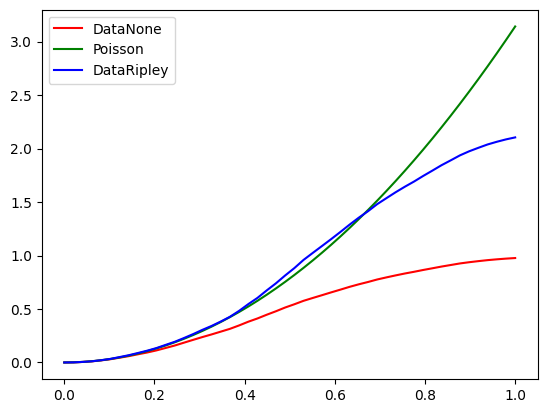

In [15]:
data = list(zip(xx[:,0], yy[:,0]))
r = np.linspace(0, 1, 50)

# total distance between all points n * (n-1) / 2
Kest = RipleysKEstimator(area=1, x_max=1, y_max=1, x_min=0, y_min=0)

plt.plot(r, Kest(data=data, radii=r, mode='none'), color='red', label='DataNone') #without correction
plt.plot(r, Kest.poisson(r), color='green', label='Poisson')
plt.plot(r, Kest(data=data, radii=r, mode='ripley'), color='blue', label='DataRipley')
plt.legend()
plt.show()

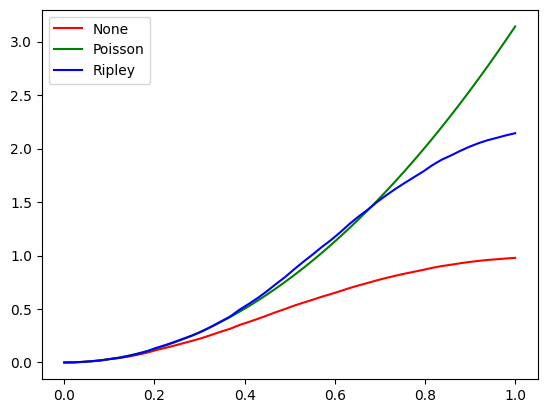

In [16]:
rng = np.random.default_rng()
data2 = rng.random((100, 2))
plt.plot(r, Kest(data=data2, radii=r, mode='none'), color='red', label='None')
plt.plot(r, Kest.poisson(r), color='green', label='Poisson')
plt.plot(r, Kest(data=data2, radii=r, mode='ripley'), color='blue', label='Ripley')
plt.legend()
plt.show()